<a href="https://colab.research.google.com/github/sangjin94/SQL_ITWILL/blob/main/da10_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

DataFrame의 문자열 컬럼 다루기

In [3]:
file_path='https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

* pd.read_csv 함수를 사용해서 movies.dat 파일을 읽고 DataFrame 생성
* 데이터프레임 정보,head,...
* 장르가 'Animation'인 영화는 몇 개?
* 장르가 로맨틱 코미디인 영화(Ramance & Comedy) 영화는 몇 개?
* 연도별 영화 개봉 숫자, 시각화

In [4]:
mv=pd.read_csv(file_path,
               sep='::', # sep=구분자(seperator) 값들을 구분하기 위해 사용된 문자열
               encoding='cp1252', # encoding= 파일의 문자열 저장 방식.
               header=None,
               engine='python',   # RarserWarning을 제거하기 위해서
               names=['moive_id','title','genres']) # names= 컬럼 이름으로 사용할 리스트

* seperator
  * `','`: 쉼표
  * `'\t'`: 탭 문자
  * `r'\s+'`: 한글자 이상의 공백을 의미하는 정규 표현식(regular expression)

* encoding
  * `utf-8`: Linux,MacOS,Unix OS에서 사용되는 기본 문자열 저장 방식
  * `cp949`: 한글 MS Windows에서 기본으로 사용되는 문자열 저장 방식.
  * `cp1252`: 영문 MS Window에서 기본으로 사용되는 문자열 저장 방식.

In [5]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   moive_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
mv.head()

,moive_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
mv.tail()

,moive_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [19]:
# Animation 장르의 영화들 - genres 컬럼의 문자열이 'Animation`을 포함
st=mv['genres'].str.contains('Animation')
len(mv[st])

105

In [9]:
# 장르가 로맨틱 코미디인 영화(Ramance & Comedy) 영화는 몇 개?
st=mv['genres'].str.contains('Romance')
st2=mv[st]
st2[st2['genres'].str.contains('Comedy')]

,moive_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [10]:
mv['title']

0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
3878               Meet the Parents (2000)
3879            Requiem for a Dream (2000)
3880                      Tigerland (2000)
3881               Two Family House (2000)
3882                 Contender, The (2000)
Name: title, Length: 3883, dtype: object

In [11]:
# 연도별 영화 개봉 숫자, 시각화
t='Toy Story(1995)'
t[-5:-1]

'1995'

In [12]:
mv.title[-5:-1]
#> movies 데이터 프레임의 title 컬럼 중에서 끝에서 5번째 부터 끝에서 1번째 전까지 선택
#> mv.title.iloc[-5:-1]와 동일한 코드

3878       Meet the Parents (2000)
3879    Requiem for a Dream (2000)
3880              Tigerland (2000)
3881       Two Family House (2000)
Name: title, dtype: object

In [13]:
mv.title.str[-5:-1]
#> movies 데이터 프레임의 title 컬럼의 문자열들을 각각 -5~-1 까지 slicing -> pd.Series

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: title, Length: 3883, dtype: object

In [14]:
mv.title.str[-5:-1].astype('int')
#> 문자열(Object)들을 원소로 갖는 Series를 정수(int)를 원소를 갖는 Series로 변환.

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: title, Length: 3883, dtype: int64

In [15]:
# movies 데이터프레임에 영화 개봉 연도(year) 컬럼(파생 변수)를 추가
mv['year']=mv.title.str[-5:-1].astype(int)

In [16]:
mv.year.value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1929      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

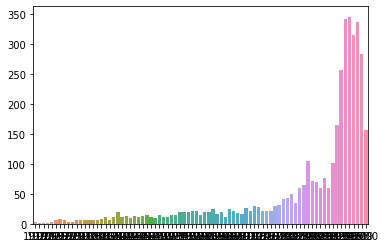

In [17]:
sns.barplot(x=mv.year.value_counts().index,y=mv.year.value_counts().values)
plt.show()

`value_counts` 메서드의 결과는 값들의 내림차순으로 정렬되어 있음.
인덱스가 정렬되어 있지 않기 때문에, 선들이 지그재그로 그려지게 됨. 
`value_counts`의 결과를 인덱스의 오름차순으로 정렬할 필요가 있음. 

* movies 데이터프레임에 가장 자주 등장하는 장르 이름 상위 10개 찾고, 시각화

In [25]:
arr=['animation','drama','animation','comedy','drama','comedy','drama']

In [26]:
#arr 원소를 key로 하고, 그 원소가 리스트에 나오는 횟수를 value로 하는 dict를 생성. 
arr_cnt={} # empty dict
for x in arr: # 리스트에서 원소를 하나씩 꺼내면서 반복
  if x in arr_cnt.keys():
    arr_cnt[x] +=1  # 숫자를 1 증가
  else: # 원소가 dict의 key로 존재하지 않으면, 처음 나오는 경우이므로
    arr_cnt[x] = 1 

print(arr_cnt)

{'animation': 2, 'drama': 3, 'comedy': 2}


In [28]:
arr_cnt.items() # (key,value) 튜플들의 리스트

dict_items([('animation', 2), ('drama', 3), ('comedy', 2)])

In [30]:
# dict를 value로 정렬: {'animation':2,'comedy':2,'drama':3}
result=sorted(arr_cnt.items(),key= lambda x: x[1],reverse=True)
print(result)
result2=dict(result)
print(result2)

[('drama', 3), ('animation', 2), ('comedy', 2)]
{'drama': 3, 'animation': 2, 'comedy': 2}


In [34]:
# pandas를 사용한 단어 개수 세기
pd.value_counts(arr) # 단어들이 index가 되고, 그 단어의 등장 횟수가 value인 pd.Series 객체

drama        3
comedy       2
animation    2
dtype: int64

In [42]:
genres=[] # 개별 영화 장르를 저장할 리스트 
for s in mv.genres:
  genres.extend(s.split('|'))

genres_count=pd.value_counts(genres) # value_count 함수는 값들의 내림차순으로 정렬된 Series를 리턴

In [43]:
top10= genres_count.head(n=10)
top10

Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64

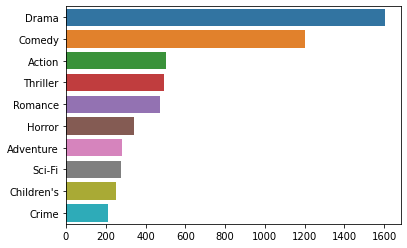

In [44]:
sns.barplot(x=top10.values,y=top10.index)
plt.show()